# Vika 7

Dagsetning: 22. mars

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Lausnir línulegra jöfnuhneppa

Hægt er að fá lausnina beint með því að kalla á `np.linalg.solve`

In [2]:
# Ax=B
A=np.array([[1,2],[4,7]])
b=np.array([1,-1])
print("A=",A)
print("b=",b)

x=np.linalg.solve(A,b)
print("x=",x)

A= [[1 2]
 [4 7]]
b= [ 1 -1]
x= [-9.  5.]


## Andhverfur fylkja

Fyrir ferningslaga fylki er andhverfan fundin með `np.linalg.inv`

In [3]:
Ainv=np.linalg.inv(A)
print("Ainv=", Ainv)

# Kanna hvort AA^(-1) sé nálægt einingafylkinu
np.allclose(np.dot(A,Ainv),np.eye(2))

Ainv= [[-7.  2.]
 [ 4. -1.]]


True

## QR þáttun
Fæst með `lingalg.qr` fallinu

In [4]:
A=np.array([[-3,-4],[4,6],[1,1]]) # Bls. 216
print("A=",A)
Q,R = np.linalg.qr(A)
print("Q=",Q)
print("R=",R)

print("QR= ",np.dot(Q,R))

A= [[-3 -4]
 [ 4  6]
 [ 1  1]]
Q= [[-0.58834841 -0.45760432]
 [ 0.78446454 -0.52297636]
 [ 0.19611614  0.7190925 ]]
R= [[ 5.09901951  7.256297  ]
 [ 0.         -0.58834841]]
QR=  [[-3. -4.]
 [ 4.  6.]
 [ 1.  1.]]


## Gerviandhverfur
Fást með `lingalg.pinv` fallinu

In [5]:
Apinv=np.linalg.pinv(A)
print("Gerviandhverfa: ", Apinv)

# Gerviandhverfan er vinstri andhverfa A
np.allclose(np.dot(Apinv,A),np.eye(2))

Gerviandhverfa:  [[-1.22222222 -1.11111111  1.77777778]
 [ 0.77777778  0.88888889 -1.22222222]]


True

## Minnstu kvaðrata verkefni - sýnidæmi bls 234 - 235

$s$ er $m$-vigur þar sem $s_i$ tilgreinir hversu mikið á að eyða í auglýsingar í miðli $i$.

Höfum óskgildi birtinga í $m$-vigri $v_{osk}$.

Finna $s$ þ.a. $Rs≈v_{osk}$ m.þ.a. leysa minnstu kvaðrata verkefni min $||Rs - v_{osk}||^2$.

In [6]:
Rmat=np.array([[0.97,1.86,0.41],
[1.23,2.18,0.53],
[0.80,1.24,0.62],
[1.29,0.98,0.51],
[1.10,1.23,0.69],
[0.67,0.34,0.54],
[0.87,0.26,0.62],
[1.10,0.16,0.48],
[1.92,0.22,0.71],
[1.29,0.12,0.62]])
m,n=Rmat.shape

# Viljum 1 milljón áhorfa í hverjum markhópi
v_osk=1E3*np.ones(m)

# Leyst með QR þáttun og endurinnsetningu
from scipy.linalg import solve_triangular
Q,R = np.linalg.qr(Rmat)
x=solve_triangular(R, np.dot(Q.T,v_osk), lower=False)
print("x=", x)

# Leyst með innbyggða Numpy fallinu lstsq
x,res,rank,_ = np.linalg.lstsq(Rmat, v_osk) # Skilar viðbótarupplýsingum
print("x=", x)
print("Fervik:", res)
print("Fjöldi línulega óháðra dálka:", rank)

x= [   62.07662454    99.98500403  1442.83746254]
x= [   62.07662454    99.98500403  1442.83746254]
Fervik: [ 175928.89516314]
Fjöldi línulega óháðra dálka: 3


## Besta lína fundin með aðferð minnstu kvaðrata

theta= [ 2.11557703  1.82436255]


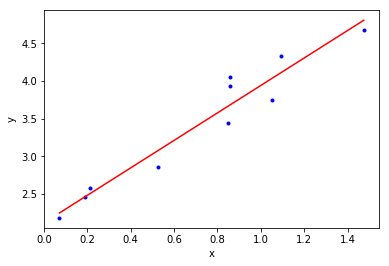

In [7]:
# Mælingar
x=np.array([ 1.09337026,  1.04992997,  0.85610187,  0.52680267,  0.85595807,
             0.84917991,  0.19139549,  1.47461725,  0.07214736,  0.21463519])

y=np.array([ 4.32739861,  3.74380467,  3.93342614,  2.86318812,  4.04902446,
             3.44288531,  2.4608442 ,  4.68238198,  2.18196362,  2.57732559])

m=x.shape[0]
A=np.c_[np.ones(m), x] # Líkan: f(x) = θ_1 + θ_2*x
theta,res,rank,_ = np.linalg.lstsq(A, y)
print("theta=",theta) # Fyrra stakið er skurðpunktur við y-ás, seinna stakið er hallatalan

# Teiknum gögnin
plt.plot(x,y,'b.')
# Teiknunm spágildin in á grafið
xp=np.linspace(min(x),max(x),100) # 100 punktar á bilinu sem x liggur á
yp=np.dot(np.c_[np.ones(xp.shape[0]), xp], theta) # Reiknum spágildi fyrir punktana í xp
plt.plot(xp,yp,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Aðhvarfsgreining með margliðum

theta= [-0.82051432  0.00953905 -0.56462499]


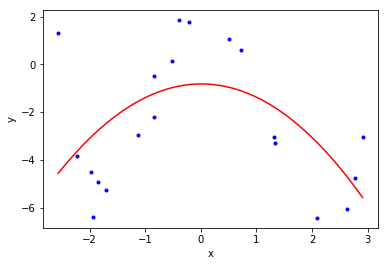

In [8]:
# Gögn
x=np.array([-0.39457146,  1.34292895,  0.71535577, -0.21048986, -1.9797859 ,
            -0.84050246, -1.85313437, -1.130359  , -2.21892485,  2.77233627,
             0.50199268,  2.0829997 ,  2.63386244,  2.90965629, -0.8407752 ,
            -2.56675427, -1.70050364, -1.93243139,  1.31981186, -0.51324789])

y=np.array([ 1.84557503, -3.29868001,  0.60648443,  1.75781402, -4.51627968,
            -0.48625485, -4.9140059 , -2.95638828, -3.82562587, -4.76127227,
             1.06134698, -6.42870509, -6.06494195, -3.06202494, -2.2087869 ,
             1.31164464, -5.26515206, -6.40478696, -3.04804836,  0.13581658])

m=x.shape[0]
# Setjum upp A-fylkið og leysum minnstu kvaðrata verkefnið
A=np.c_[np.ones(m), x, x**2] # Líkan: f(x) = θ_1 + θ_2*x + θ_3*x^3
theta,res,rank,_ = np.linalg.lstsq(A, y)
print("theta=",theta) # Fyrra stakið er skurðpunktur við y-ás, seinna stakið er hallatalan

# Teiknum gögnin
plt.plot(x,y,'b.')
# Teiknunm spágildin in á grafið
xp=np.linspace(min(x),max(x),100) # 100 punktar á bilinu sem x liggur á
yp=np.dot(np.c_[np.ones(xp.shape[0]), xp, xp**2], theta) # Reiknum spágildi fyrir punktana í xp
plt.plot(xp,yp,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## NumPy föll fyrir aðhvarfsgreiningu

Vandermonde fylkið er útfært í numpy með `vander` fallinu, setjum `increasing=True` til að fá veldin í vaxandi röð, en numpy vill frekar hafa það í minnkandi röð.

Enn einfaldara er svo að nota `polyfit` fallið og `poly1d` klasann.

theta= [-0.82051432  0.00953905 -0.56462499]


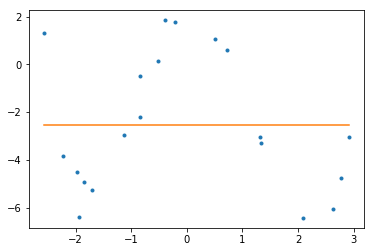

 
-2.526


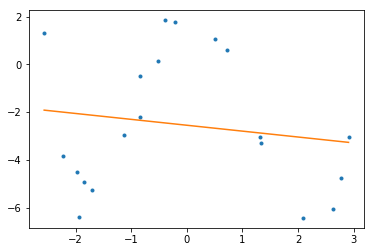

 
-0.2463 x - 2.55


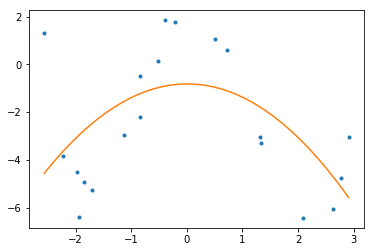

         2
-0.5646 x + 0.009539 x - 0.8205


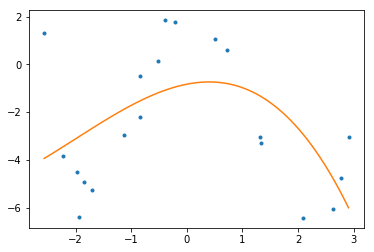

          3         2
-0.08657 x - 0.516 x + 0.4566 x - 0.8315


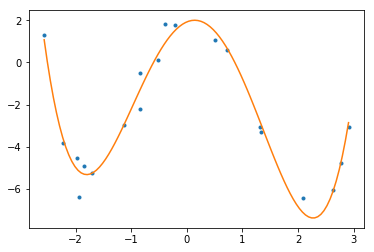

        4          3         2
0.4842 x - 0.3955 x - 3.898 x + 1.119 x + 1.927


In [9]:
p=3 # Hæsta gráða margliðu + 1
A=np.vander(x,p,increasing=True)
theta,res,rank,_ = np.linalg.lstsq(A, y)
print("theta=",theta) # Fyrra stakið er skurðpunktur við y-ás, seinna stakið er hallatalan

for k in range(5):
    pz = np.polyfit(x,y,k) # finnum k-ta stigs margliðu
    p = np.poly1d(pz) # Klasi sem einfaldar umstang með margliður
    xp = np.linspace(min(x),max(x),100)
    plt.plot(x,y,'.',xp,p(xp),'-') # plottum gögn vs margliðu
    plt.show()
    print(p)